# Composing custom workflows

This recipe shows how to combine applications to create custom workflows in `ete-build`.
It shows how to explore the list of available applications and used them in a custom way.

## Requirement

- ete3
- ete3_external_apps
- [Basic concepts regarding ete-build](ete_build_basics.ipynb) 


## Recipe

### 1. Browse available applications 

Apart from the list of predefined workflows, ETE permits to define custom workfows by combining pre-defined application bindings.

A list of available apps can be get with the command `ete3 build apps`


In [3]:
%%bash 
ete3 build apps

---------------------------------------------------------------------------------------------------------------------
                                                    tree builders                                                    
---------------------------------------------------------------------------------------------------------------------
name                    | app type | desc.                                                                           
======================= | ======== | ================================================================================
bionj_default           | phyml    | BioNJ tree inferred with Phyml. default models JTT/GTR                          
fasttree_default        | fasttree | Fasttree with default parameters                                                
fasttree_full           | fasttree | Fasttree with slow NNI and MLACC=3                                              
phyml_default           | phyml    | Phyml tree using +G

application can also be looked up by group name: "aligners", "alg cleaners", etc... 

In [21]:
%%bash 
ete3 build apps "model testers" "alg cleaners"

---------------------------------------------------------------------------------------------------------------
                                                 model testers                                                 
---------------------------------------------------------------------------------------------------------------
name                      | app type   | desc.                                                                 
========================= | ========== | ======================================================================
prottest_default          | prottest   | Uses BioNJ trees to select best protein model from: JTT, WAG, VT, LG a
                          |            | nd MtREV. Fixed parameters: +G+I+F                                    
pmodeltest_full_ultrafast | pmodeltest | Test all models using NJ tree inference and skipping gamma, invariant 
                          |            | sites, and frequency site estimations (!G!I!F)                 

### 2. Understanding workflow names

There are currently 4 types of applications that can be used to create a workflow: **aligners, alignment trimmers, model testers and tree builders.**

A custom workflow name can be created using the following format:
```
aligner-trimmer-tester-builder
```

Where each word separated by "-" represents a valid name from the list of available application bindings. For instance, a valid workflow names would be:

```
mafft_linsi-trimal01-pmodeltest_soft_ultrafast-raxml_default
```

The word _`none`_ is also allowed to indicate that a step should be ignored. 

Any workflow name following such format can be passed with the `-w` option to `ete-build`. The list of available workflows produced by `ete3 build workflows` is in fact a list of aliases to real workflow names. For instance, 

`standard_fasttree`, **translates into** `clustalo_default-none-none-fasttree_default`



### 3. Run your preferred workflow

Once you understand how workflow names, you can compose your own pipeline of programs and run it through `ete-build`.

In [26]:
%%bash 
ete3 build -a data/NUP62.aa.fa -o custom/ --clearall -w mafft_linsi-trimal01-pmodeltest_soft_ultrafast-raxml_default


Toolchain path: /Users/jhc/anaconda/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build - reproducible phylogenetic workflows 
                                    unknown, unknown.

      If you use ETE in a published work, please cite:

        Jaime Huerta-Cepas, Joaquín Dopazo and Toni Gabaldón. ETE: a python
        Environment for Tree Exploration. BMC Bioinformatics 2010,
        11:24. doi:10.1186/1471-2105-11-24

      (Note that a list of the external programs used to complete all necessary
      computations will be also shown after execution. Those programs should
      also be cited.)
      --------------------------------------------------------------------------------

    
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - FastTree Version 2.1.8 Double precision (No SSE3), OpenMP (1 threa

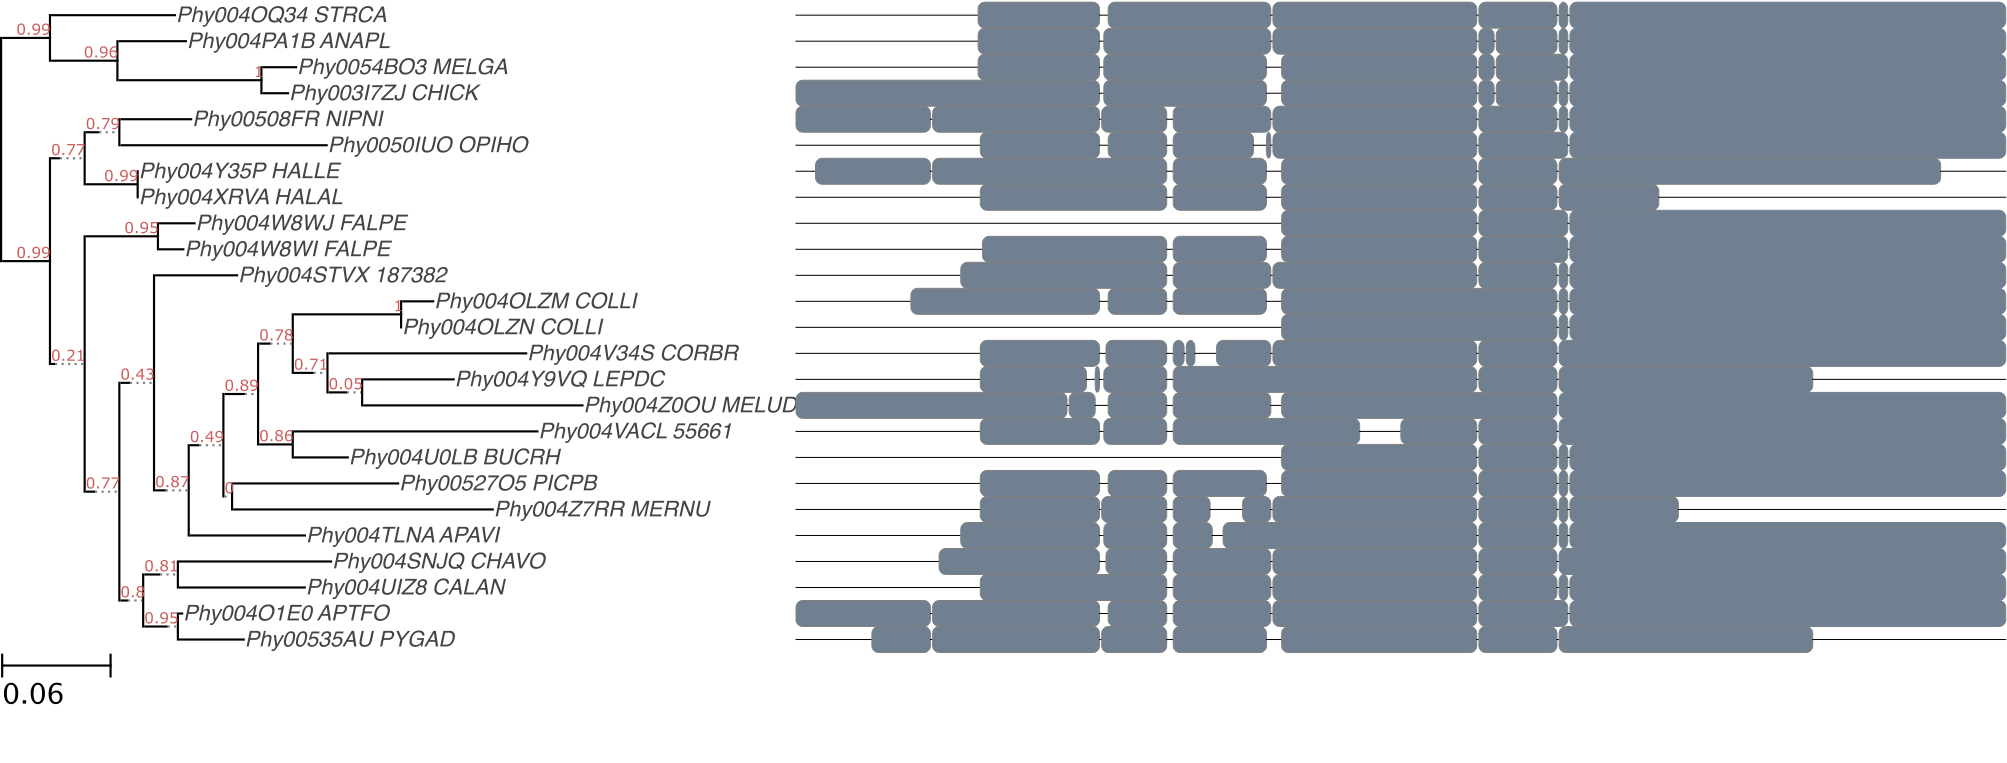

In [29]:
from IPython.display import Image
Image(filename='custom/mafft_linsi-trimal01-pmodeltest_soft_ultrafast-raxml_default//NUP62.aa.fa.final_tree.png')